In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [2]:
df = pd.read_csv('E:\Media, Docs & Programs\Practice\DataScience\Mine\IBM\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [4]:
df.shape

(1470, 35)

In [5]:
df.isna().sum().sum()

0

In [6]:
df.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


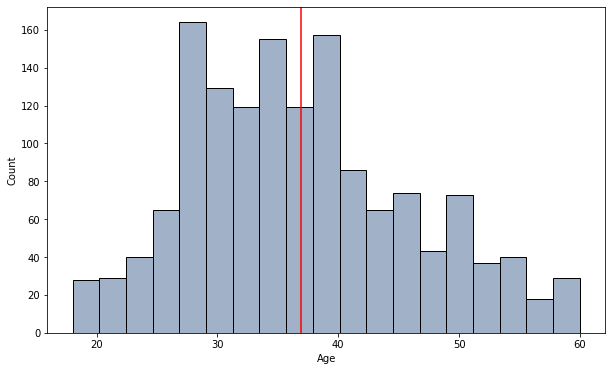

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', color='#8297b5')
plt.axvline(df['Age'].mean(), color='red')

([<matplotlib.axis.XTick at 0x23233774130>,
 [Text(0, 0, 'Below College'),
  Text(1, 0, 'College'),
  Text(2, 0, 'Bachelor'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Doctor')])

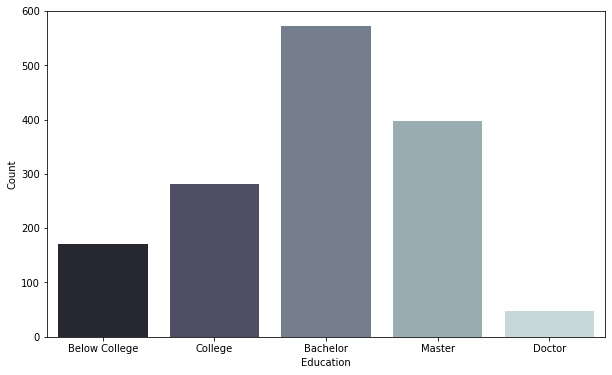

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame(df.groupby('Education').EmployeeNumber.count()).reset_index(),
               x='Education', y='EmployeeNumber', palette='bone')
plt.ylabel('Count')
plt.xticks(np.arange(5) ,labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

Text(0, 0.5, 'Count')

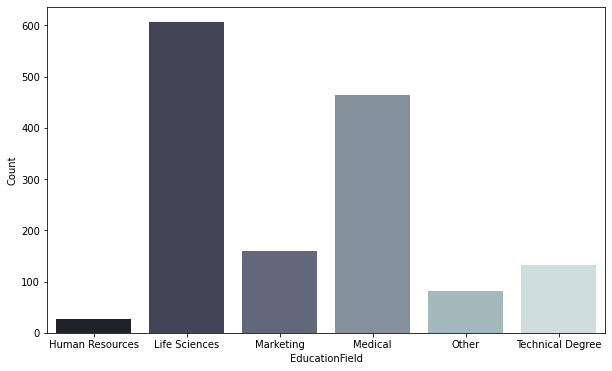

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame(df.groupby('EducationField').EmployeeNumber.count()).reset_index(),
               x='EducationField', y='EmployeeNumber', palette='bone')
plt.ylabel('Count')

<AxesSubplot:xlabel='Gender', ylabel='EmployeeNumber'>

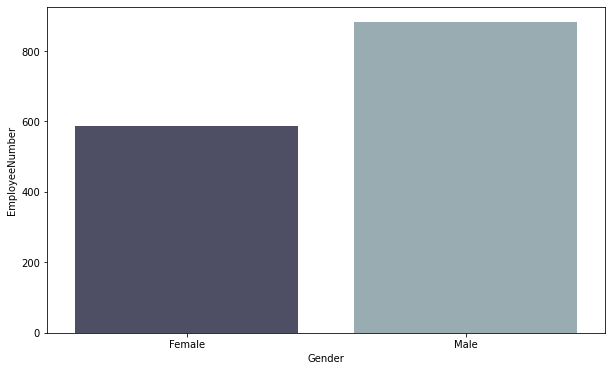

In [10]:
plt.figure(figsize=(10, 6))
# sns.histplot(x=df['Gender'])
sns.barplot(data=pd.DataFrame(df.groupby('Gender')['EmployeeNumber'].count()).reset_index(), 
                x='Gender', y='EmployeeNumber', palette='bone')

از آنجایی که بخش بزرگتر جامعه شرکت توسط مردان تشکیل شده است میتوانیم این تردید را داشته باشیم که در شرایط مختلف ممکن است ارجحیت هایی برای مردان در نظر گرفته شود و باید به دنبال این موارد در تحلیل خود باشیم تا در صورتی که واقعا چنین مسائلی مطرح بودند به سرعت پیگیری شوند

<AxesSubplot:xlabel='MaritalStatus', ylabel='EmployeeNumber'>

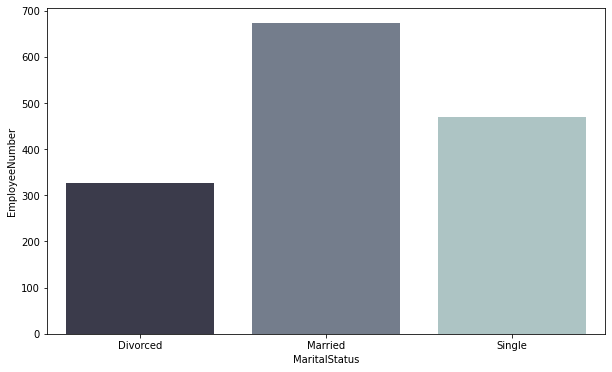

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame(df.groupby('MaritalStatus')['EmployeeNumber'].count()).reset_index(), 
                x='MaritalStatus', y='EmployeeNumber', palette='bone')

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

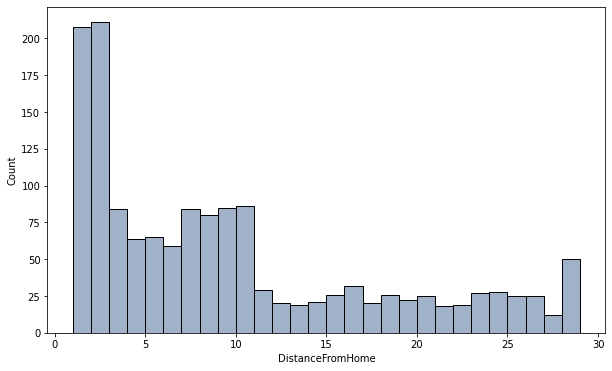

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DistanceFromHome', bins=range(1, 30), color='#8297b5')

معیار سنجش فاصله محل کار تا خانه به روشنی معلوم نیست اما صرف این مسئله که نسبتی از فاصله را با مقایسه با سایر کارمندان میتوان بدست آورد قابل قبول است

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

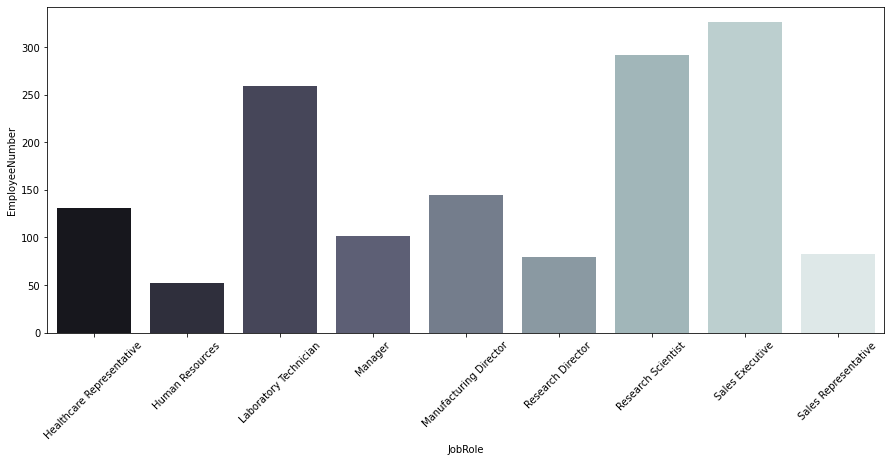

In [13]:
plt.figure(figsize=(15, 6))
sns.barplot(data=pd.DataFrame(df.groupby('JobRole')['EmployeeNumber'].count()).reset_index(), 
                x='JobRole', y='EmployeeNumber', palette='bone')
plt.xticks(rotation=45)

<AxesSubplot:ylabel='NumCompaniesWorked'>

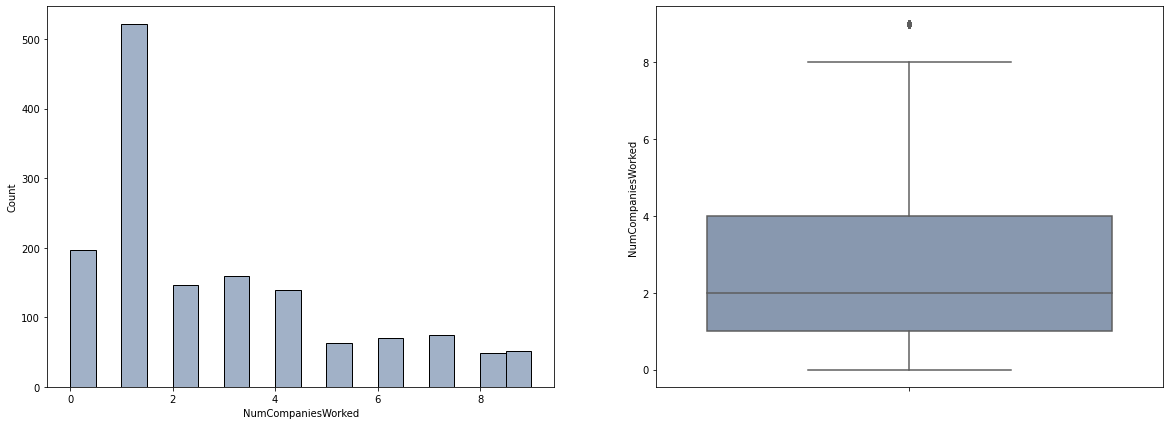

In [14]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='NumCompaniesWorked', color='#8297b5')
plt.subplot(1,2,2)
sns.boxplot(data=df, y='NumCompaniesWorked',  color='#8297b5')

به صورت میانگین کارمندان شرکت قبل از استخدام در شرکت ما، سابقه ار کردن در حدودا 2 شرکت دیگر را نیز داشته اند

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Count'>

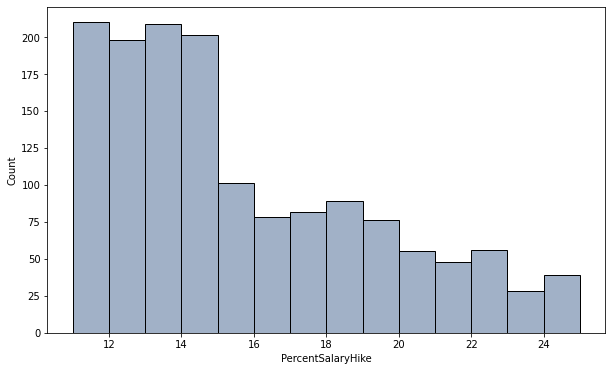

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PercentSalaryHike',  color='#8297b5')

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

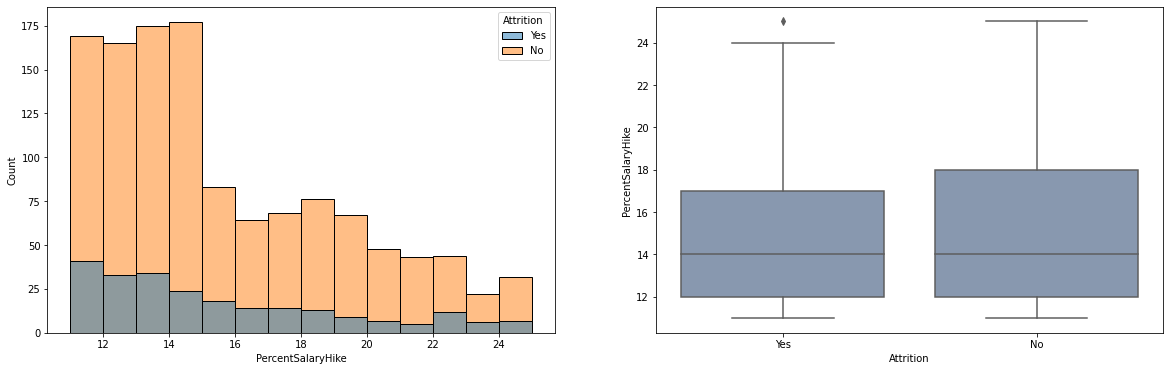

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x='PercentSalaryHike', hue='Attrition', color='#8297b5')
plt.subplot(122)
sns.boxplot(data=df, y='PercentSalaryHike', x='Attrition', color='#8297b5')

In [17]:
attrition_salaryhike = stats.ttest_ind(df[df['Attrition']=="Yes"]['PercentSalaryHike'], df[df['Attrition']=="No"]['PercentSalaryHike'], alternative='greater')
print('p-value: ', attrition_salaryhike[1])

if attrition_salaryhike[1] <= 0.05: 
    print('reject H0: mean of PercentSalaryHike for "No" group is less or equal to "yes" group.')
else: 
    print('accept H0: mean of PercentSalaryHike for "No" group is greater than "yes" group.')

p-value:  0.6971935880553122
accept H0: mean of PercentSalaryHike for "No" group is greater than "yes" group.


بدین گونه میتوانیم بگوییم که میزان افزایش حقوق سالیانه بر استهلاک نیروها تاثیر گذار است و آن ها که درصد حقوق  بیشتری سالانه به آن ها اضافه میشود، احتمال کمتری دارند تا به دلیل استهلاک از شرکت خارج شوند

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

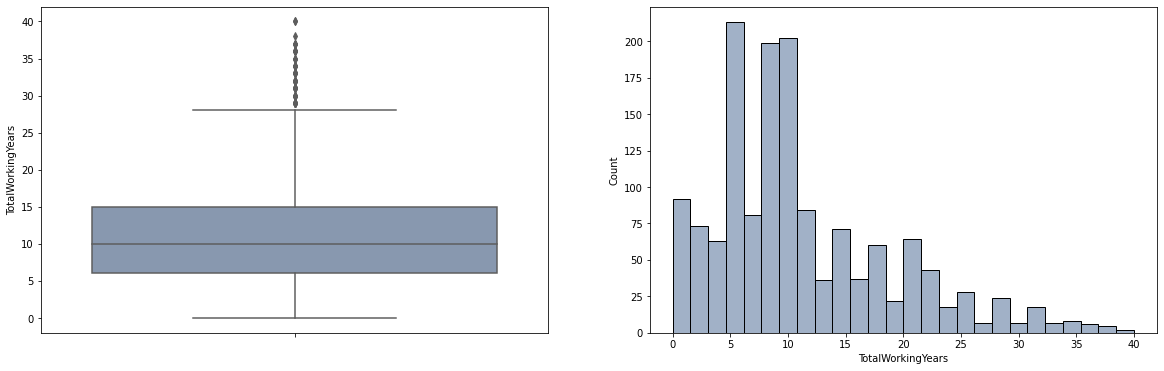

In [18]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='TotalWorkingYears', color='#8297b5')
plt.subplot(1,2,2)
sns.histplot(data=df, x='TotalWorkingYears', color='#8297b5')

در واقع با توجه به اینکه عمده کارکنان شرکت در حد فاصل سنی بین 30 تا 40 سال قرار دارند، کاملا طبیعی است که مجموع سال های کار کارمندان در حدود 5 تا 10 سال شلوغ تر باشد

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

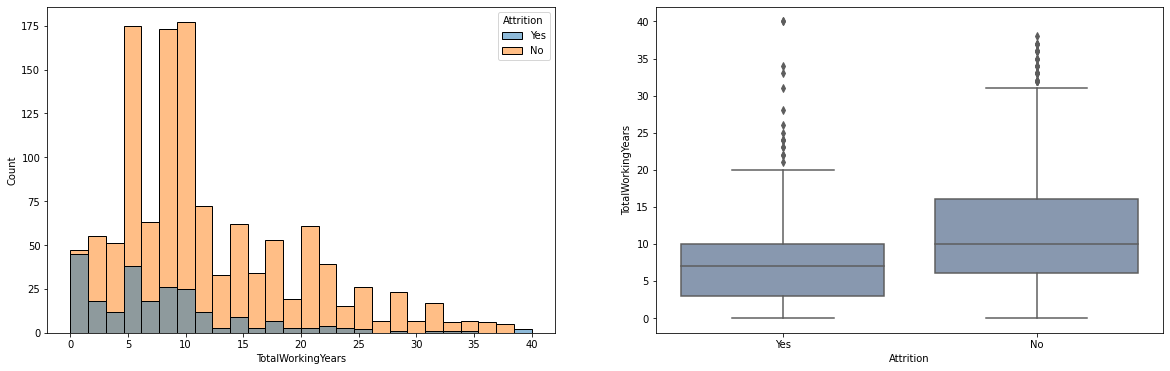

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', color='#8297b5')
plt.subplot(122)
sns.boxplot(data=df, y='TotalWorkingYears', x='Attrition', color='#8297b5')

In [20]:
attrition_workingyears = stats.ttest_ind(df[df['Attrition']=="Yes"]['TotalWorkingYears'], df[df['Attrition']=="No"]['TotalWorkingYears'], alternative='greater')
print('p-value: ', attrition_workingyears[1])

if attrition_workingyears[1] <= 0.05: 
    print('reject H0: mean of TotalWorkingYears for "No" group is less or equal to "yes" group.')
else: 
    print('accept H0: mean of TotalWorkingYears for "No" group is greater than "yes" group.')

p-value:  0.9999999999796906
accept H0: mean of TotalWorkingYears for "No" group is greater than "yes" group.


همچنین هر چقدر سابقه کاری بیشتری به صورت کلی داشته باشند احتمال خورج و استهلاک این کارمندان کمتر است میتوان تصور کرد که این موضوع به علت آشنایی بیشتر با شرایط کاری و توانایی بیشتر در کنترل خود است

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

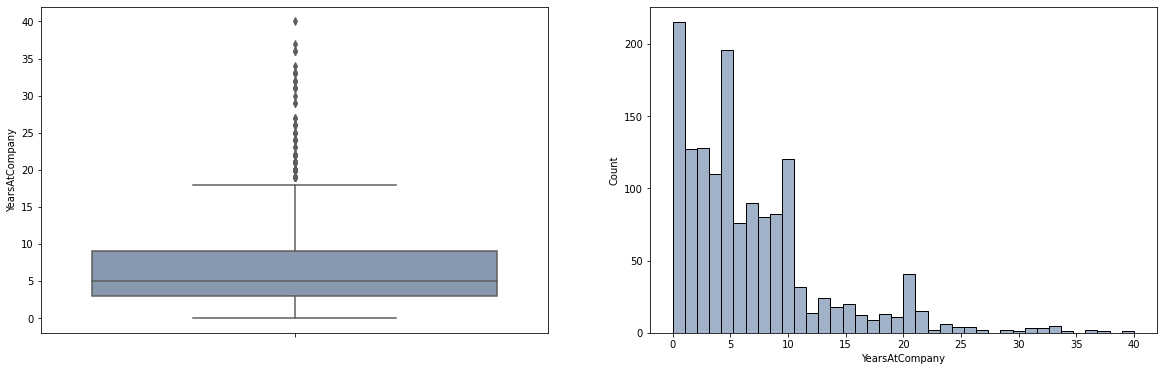

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='YearsAtCompany', color='#8297b5')
plt.subplot(1,2,2)
sns.histplot(data=df, x='YearsAtCompany', color='#8297b5')

از دیگر مواردی که میتوان به آن اشاره کرد این است که بسیاری از کارکنان زیر 10 سال سابقه کار در شرکت ما را دارند، با اینحال وجود افرادی که حدود 40 سال در شرکت کار کرده اند نشان از این دارد که این شرکت، شرکت خیلی جوانی نیست

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

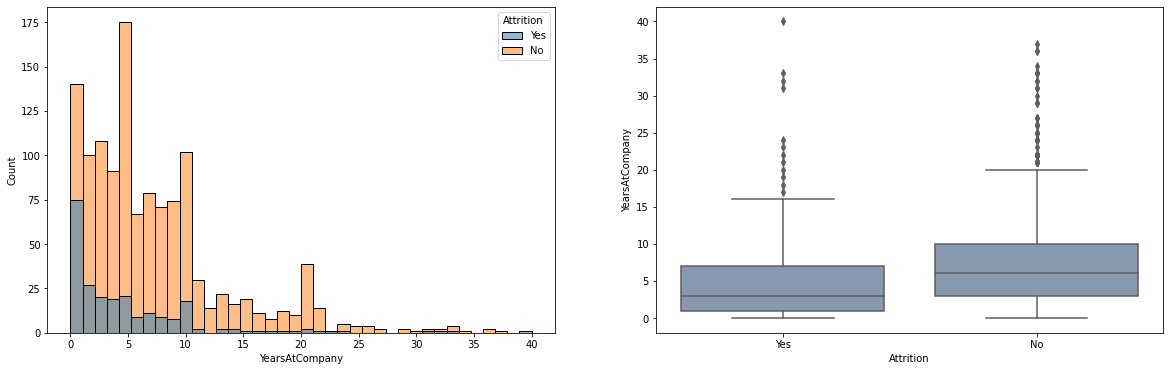

In [22]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', color='#8297b5')
plt.subplot(122)
sns.boxplot(data=df, y='YearsAtCompany', x='Attrition', color='#8297b5')

In [23]:
attrition_yearsatcompany = stats.ttest_ind(df[df['Attrition']=="Yes"]['YearsAtCompany'], df[df['Attrition']=="No"]['YearsAtCompany'], alternative='greater')
print('p-value: ', attrition_yearsatcompany[1])

if attrition_yearsatcompany[1] <= 0.05: 
    print('reject H0: mean of YearsAtCompany for "No" group is less or equal to "yes" group.')
else: 
    print('accept H0: mean of YearsAtCompany for "No" group is greater than "yes" group.')

p-value:  0.9999998840564195
accept H0: mean of YearsAtCompany for "No" group is greater than "yes" group.


به دنبال سابقه کاری، گذراندن سال های بیشتر و سابقه کاری در خود شرکت نیز میتواند به آشنایی با شرایط و فرهنگ شرکت کمک کند و باعث بشود تا افرادی که سابقه بیشتری در شرکت دارند، استهلاک را بهتر مدیریت کنند

<AxesSubplot:ylabel='MonthlyRate'>

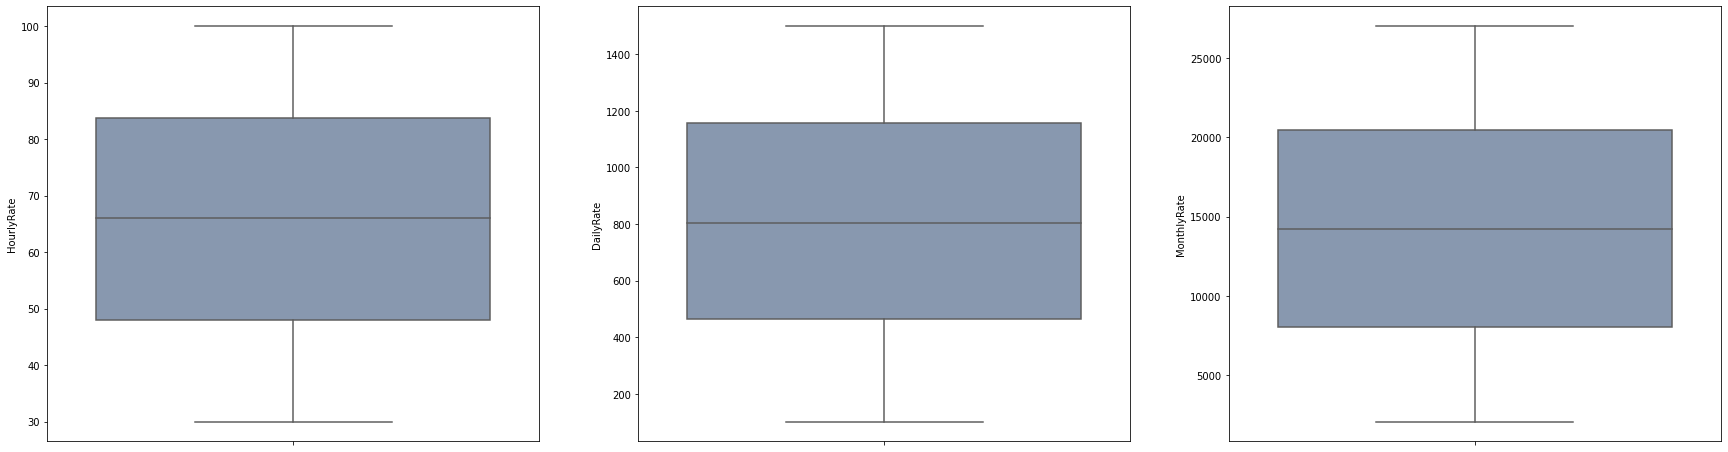

In [24]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='HourlyRate', color='#8297b5')
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='DailyRate', color='#8297b5')
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='MonthlyRate', color='#8297b5')

با محاسبه میزان کار کردن افراد در ماه، روز و ساعت و اینکه میانگین هزینه کارمندان از نظر واحد منابع انسانی چقدر است متوجه میشویم که ناهنجاری خاصی بین این مقادیر نیست و با انجام محاسباتی کوچک، یکسان بودن این مقادیر قابل توجیه است

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

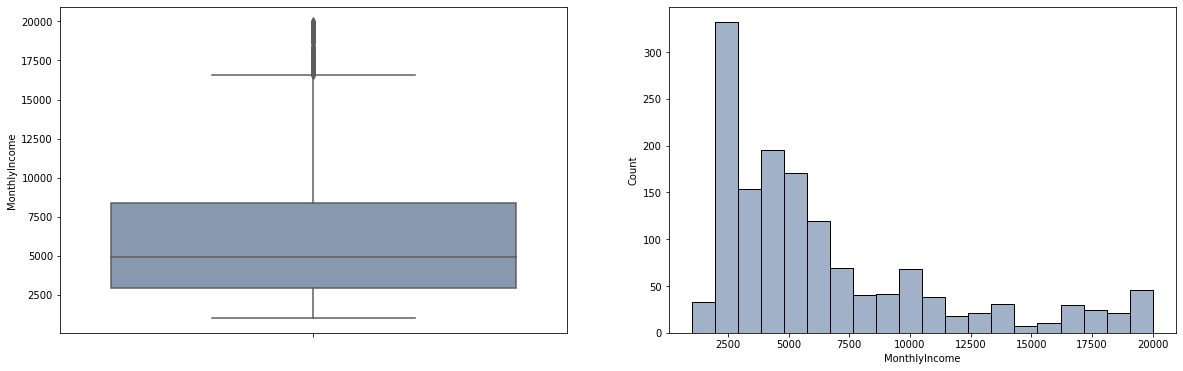

In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.boxplot(data=df, y='MonthlyIncome', color='#8297b5')
plt.subplot(1,2,2)
sns.histplot(data=df, x='MonthlyIncome', color='#8297b5')

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

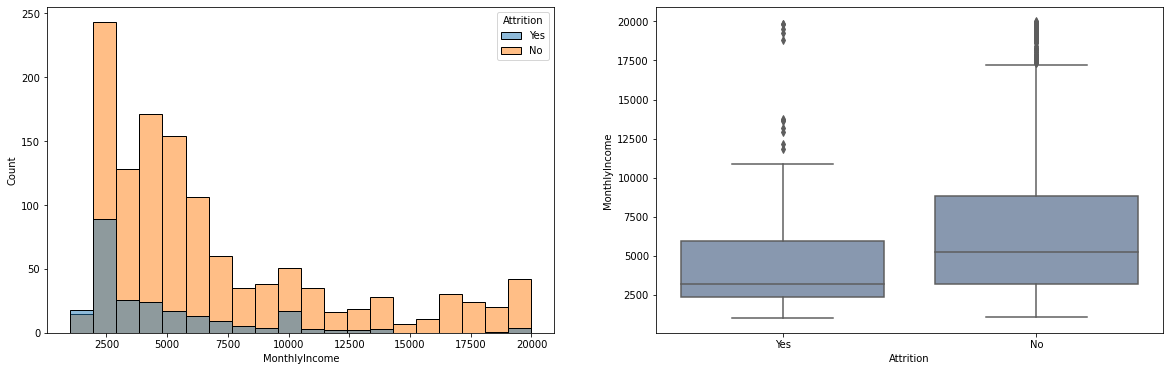

In [26]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', color='#8297b5')
plt.subplot(122)
sns.boxplot(data=df, y='MonthlyIncome', x='Attrition', color='#8297b5')

In [27]:
attrition_Income = stats.ttest_ind(df[df['Attrition']=="Yes"]['MonthlyIncome'], df[df['Attrition']=="No"]['MonthlyIncome'], alternative='greater')
print('p-value: ', attrition_Income[1])

if attrition_Income[1] <= 0.05: 
    print('reject H0: mean of Income for "No" group is less or equal to "yes" group.')
else: 
    print('accept H0: mean of Income for "No" group is greater than "yes" group.')

p-value:  0.9999999996426319
accept H0: mean of Income for "No" group is greater than "yes" group.


طبیعتا میزان حقوق دریافتی توسط کارمندان نیز بر استهلاک آن ها تاثیر گذار است

<AxesSubplot:xlabel='BusinessTravel', ylabel='Count'>

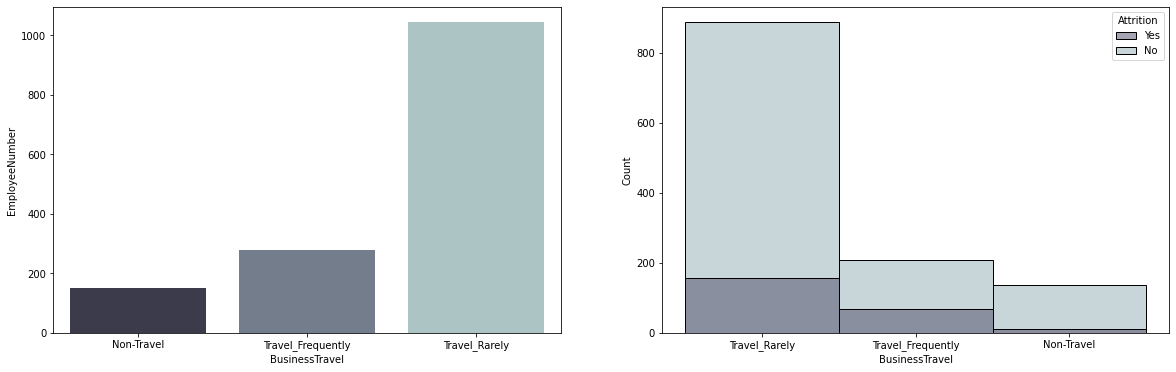

In [28]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=pd.DataFrame(df.groupby('BusinessTravel')['EmployeeNumber'].count()).reset_index(), 
                x='BusinessTravel', y='EmployeeNumber', palette='bone')
plt.subplot(122)
sns.histplot(data=df, x='BusinessTravel', hue='Attrition', palette='bone')

In [29]:
contingency_table = pd.crosstab(df.BusinessTravel, df.Attrition) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=2
[[125.81632653  24.18367347]
 [232.34081633  44.65918367]
 [874.84285714 168.15714286]]
probability=0.950, critical=5.991, stat=24.182
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


مشاهده میکنید که میزان سفرهایی که کارمندان مجبور هستند در مدت کاری خود در دستور کاری قرار دهند با مستهلک شدن آن ها ارتباط دارد

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Count'>

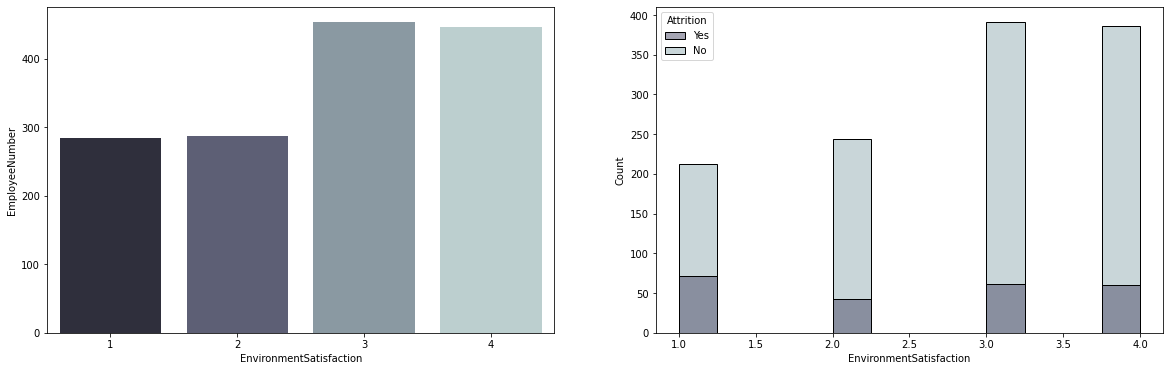

In [30]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=pd.DataFrame(df.groupby('EnvironmentSatisfaction')['EmployeeNumber'].count()).reset_index(), 
                x='EnvironmentSatisfaction', y='EmployeeNumber', palette='bone')
plt.subplot(122)
sns.histplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', palette='bone')

In [31]:
contingency_table = pd.crosstab(df.EnvironmentSatisfaction, df.Attrition) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[238.2122449   45.7877551 ]
 [240.72857143  46.27142857]
 [379.96530612  73.03469388]
 [374.09387755  71.90612245]]
probability=0.950, critical=7.815, stat=22.504
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


به دنبال سایر فیچرها طبیعتا میتوان انتظار داشت که رضایت محیطی نیز با استهلاک کارمندان مرتبط است

<AxesSubplot:xlabel='JobInvolvement', ylabel='Count'>

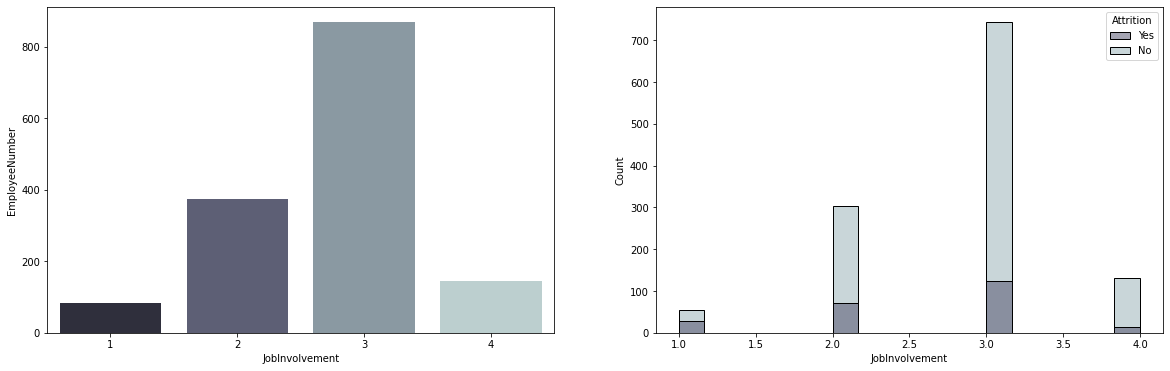

In [32]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=pd.DataFrame(df.groupby('JobInvolvement')['EmployeeNumber'].count()).reset_index(), 
                x='JobInvolvement', y='EmployeeNumber', palette='bone')
plt.subplot(122)
sns.histplot(data=df, x='JobInvolvement', hue='Attrition', palette='bone')

In [33]:
contingency_table = pd.crosstab(df.JobInvolvement, df.Attrition) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[ 69.61836735  13.38163265]
 [314.54081633  60.45918367]
 [728.05714286 139.94285714]
 [120.78367347  23.21632653]]
probability=0.950, critical=7.815, stat=28.492
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


مشارکت در کار نیز با استهلاک مرتبط است و طبیعتا هرچه مشارکت کم تر باشد میزان استهلاک کارمندان بیشتر است

<AxesSubplot:xlabel='JobLevel', ylabel='Count'>

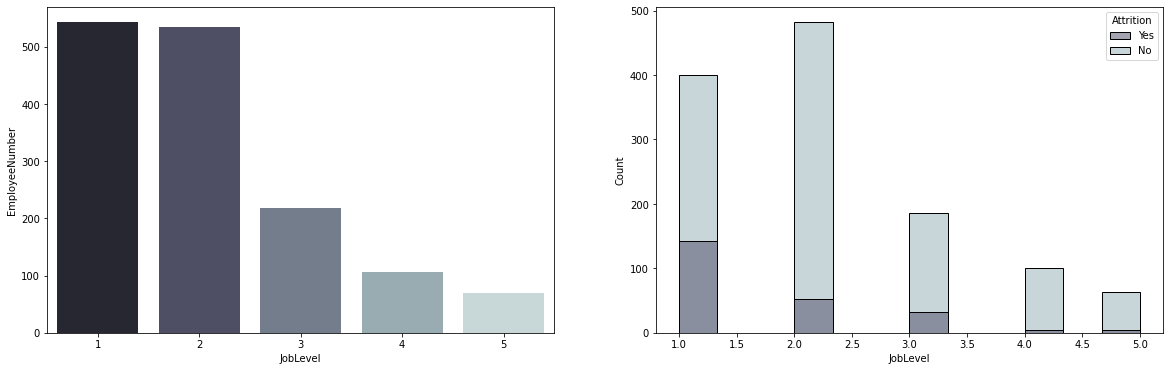

In [34]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=pd.DataFrame(df.groupby('JobLevel')['EmployeeNumber'].count()).reset_index(), 
                x='JobLevel', y='EmployeeNumber', palette='bone')
plt.subplot(122)
sns.histplot(data=df, x='JobLevel', hue='Attrition', palette='bone')

In [35]:
contingency_table = pd.crosstab(df.JobLevel, df.Attrition) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=4
[[455.45510204  87.54489796]
 [447.90612245  86.09387755]
 [182.85306122  35.14693878]
 [ 88.91020408  17.08979592]
 [ 57.8755102   11.1244898 ]]
probability=0.950, critical=9.488, stat=72.529
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


میتوانیم با اطمینان بگوییم که جایگاه شغلی تاثیر زیادی در ادامه همکاری کارمندان با شرکت دارد

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Count'>

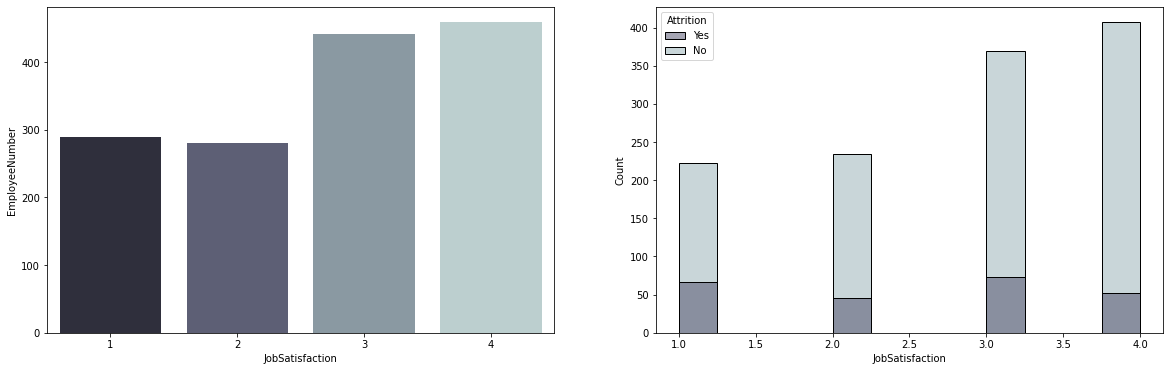

In [36]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=pd.DataFrame(df.groupby('JobSatisfaction')['EmployeeNumber'].count()).reset_index(), 
                x='JobSatisfaction', y='EmployeeNumber', palette='bone')
plt.subplot(122)
sns.histplot(data=df, x='JobSatisfaction', hue='Attrition', palette='bone')

In [37]:
contingency_table = pd.crosstab(df.JobSatisfaction, df.Attrition) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[242.40612245  46.59387755]
 [234.85714286  45.14285714]
 [370.73877551  71.26122449]
 [384.99795918  74.00204082]]
probability=0.950, critical=7.815, stat=17.505
Dependent (reject H0)
significance=0.050, p=0.001
Dependent (reject H0)


<AxesSubplot:xlabel='PerformanceRating', ylabel='Count'>

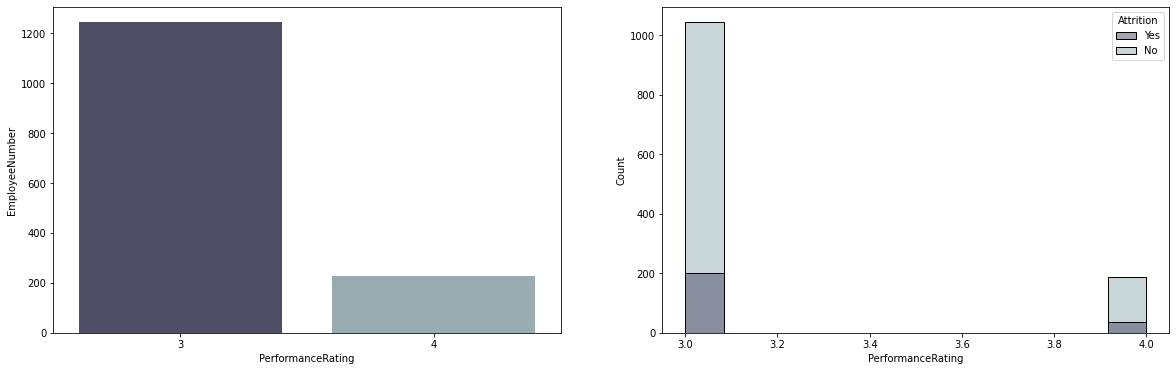

In [38]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=pd.DataFrame(df.groupby('PerformanceRating')['EmployeeNumber'].count()).reset_index(), 
                x='PerformanceRating', y='EmployeeNumber', palette='bone')
plt.subplot(122)
sns.histplot(data=df, x='PerformanceRating', hue='Attrition', palette='bone')                

In [39]:
contingency_table = pd.crosstab(df.PerformanceRating, df.Attrition) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[1043.43673469  200.56326531]
 [ 189.56326531   36.43673469]]
probability=0.950, critical=3.841, stat=0.000
Independent (fail to reject H0)
significance=0.050, p=0.990
Independent (fail to reject H0)


یکی از مواردی که شاید مورد توجه باشد این است که رابطه ای بین استهلاک کارکنان و نمره دهی راندمان آن ها نیست و به نوعی استهلاک کارمندان ناشی از احساسات درونی خود کارمندان است و لزوما ارتباطی با راندمان و عملکرد آن ها ندارد

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Count'>

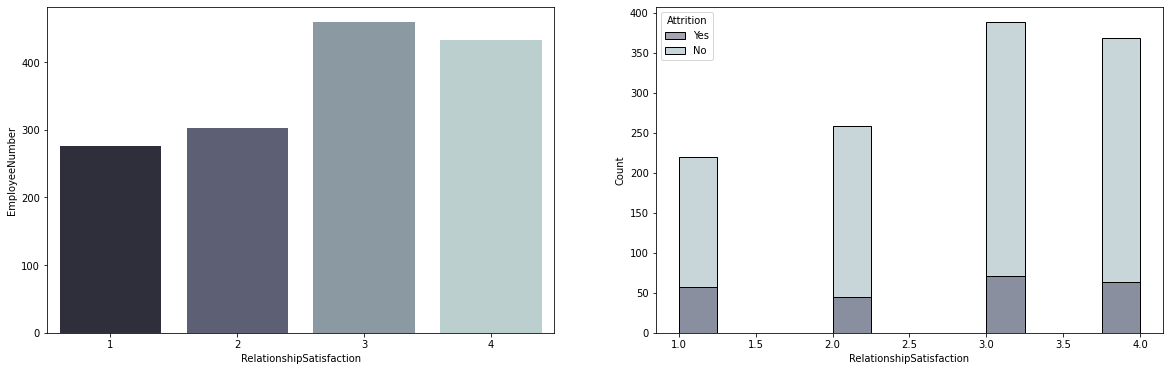

In [40]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=pd.DataFrame(df.groupby('RelationshipSatisfaction')['EmployeeNumber'].count()).reset_index(), 
                x='RelationshipSatisfaction', y='EmployeeNumber', palette='bone')
plt.subplot(122)
sns.histplot(data=df, x='RelationshipSatisfaction', hue='Attrition', palette='bone')                                

In [41]:
contingency_table = pd.crosstab(df.RelationshipSatisfaction, df.Attrition) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[231.50204082  44.49795918]
 [254.14897959  48.85102041]
 [384.99795918  74.00204082]
 [362.35102041  69.64897959]]
probability=0.950, critical=7.815, stat=5.241
Independent (fail to reject H0)
significance=0.050, p=0.155
Independent (fail to reject H0)


<AxesSubplot:xlabel='Attrition', ylabel='Age'>

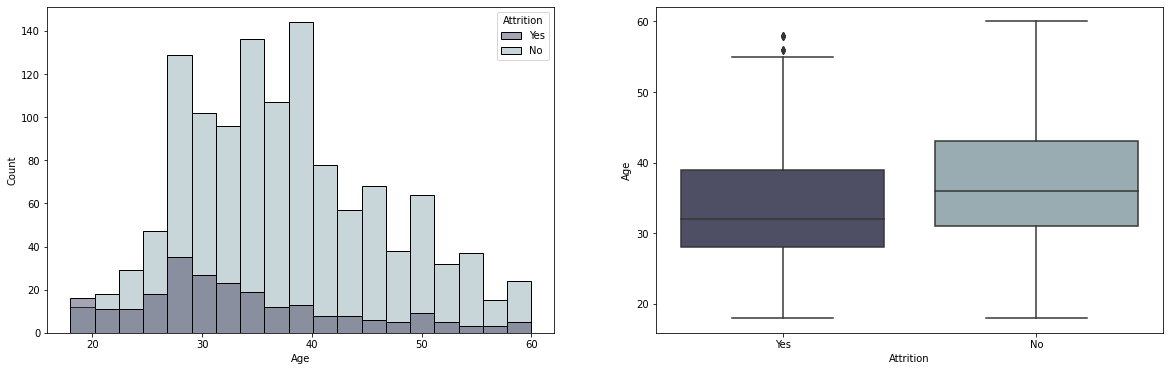

In [42]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Attrition', palette='bone')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Attrition', y='Age', palette='bone')

In [43]:
attrition_age = stats.ttest_ind(df[df['Attrition']=="Yes"]['Age'], df[df['Attrition']=="No"]['Age'], alternative='greater')
print('p-value: ', attrition_age[1])

if attrition_age[1] <= 0.05: 
    print('reject H0: mean age of "No" group is less or equal to "yes" group.')
else: 
    print('accept H0: mean age of "No" group is greater than "yes" group.')

p-value:  0.9999999995821847
accept H0: mean age of "No" group is greater than "yes" group.


قابل توجیه است که افراد با سن پایین تر احتمال بیشتری برای خروج از شرکت دارند، درواقع آستانه صبر کوتاه تر و همچنین انگیزه برای تغییر شرایط زندگی از عواملی است که باعث میشود یک جوان سریع تر دست به تغییر بزند

<AxesSubplot:xlabel='EducationField', ylabel='Count'>

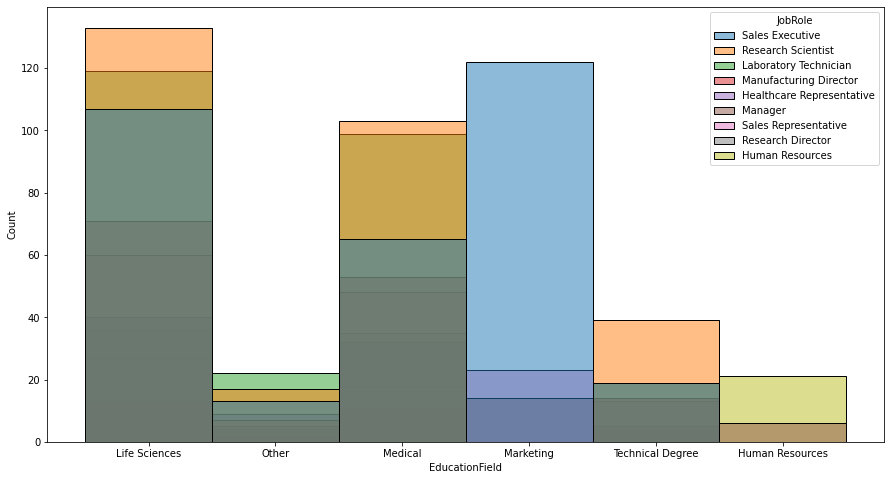

In [44]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='EducationField', hue='JobRole')

In [45]:
contingency_table = pd.crosstab(df.JobRole, df.EducationField) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
JobRole,,,,,,
Healthcare Representative,0.000000,0.099010,0.000000,0.103448,0.109756,0.106061
Human Resources,0.777778,0.021452,0.000000,0.023707,0.036585,0.030303
Laboratory Technician,0.000000,0.196370,0.000000,0.213362,0.268293,0.143939
Manager,0.222222,0.066007,0.088050,0.068966,0.060976,0.037879
Manufacturing Director,0.000000,0.117162,0.000000,0.114224,0.085366,0.106061
Research Director,0.000000,0.059406,0.000000,0.075431,0.048780,0.037879
Research Scientist,0.000000,0.219472,0.000000,0.221983,0.207317,0.295455
Sales Executive,0.000000,0.176568,0.767296,0.140086,0.158537,0.143939
Sales Representative,0.000000,0.044554,0.144654,0.038793,0.024390,0.098485


In [46]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=40
[[  2.40612245  54.00408163  14.16938776  41.34965986   7.30748299
   11.76326531]
 [  0.95510204  21.43673469   5.6244898   16.41360544   2.90068027
    4.66938776]
 [  4.75714286 106.77142857  28.01428571  81.75238095  14.44761905
   23.25714286]
 [  1.87346939  42.04897959  11.03265306  32.19591837   5.68979592
    9.15918367]
 [  2.66326531  59.7755102   15.68367347  45.76870748   8.08843537
   13.02040816]
 [  1.46938776  32.97959184   8.65306122  25.25170068   4.46258503
    7.18367347]
 [  5.36326531 120.3755102   31.58367347  92.16870748  16.28843537
   26.22040816]
 [  5.9877551  134.39183673  35.26122449 102.90068027  18.18503401
   29.27346939]
 [  1.5244898   34.21632653   8.97755102  26.19863946   4.62993197
    7.45306122]]
probability=0.950, critical=55.758, stat=864.756
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


همچنین کاملا طبیعی است که بین رشته تحصیلی شرکت کارمندان و شغل آن ها رابطه وجود داشته باشد، در حقیقت این نشان میدهد که شرکت تا آنجا که میتوانسته تلاش کرده است تا با قرار دادن افراد در مکان هایی که به آن تعلق دارند علاوه بر بهره بردن از دانش این افراد در مکان درست، به ثبات و پایین آوردن استهلاک کارممندان نیز اهمیت میدهد

<AxesSubplot:xlabel='JobRole', ylabel='Count'>

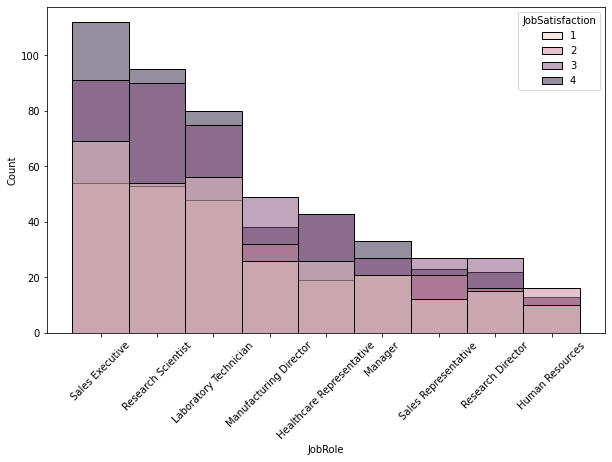

In [47]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.histplot(data=df, x='JobRole', hue='JobSatisfaction')

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

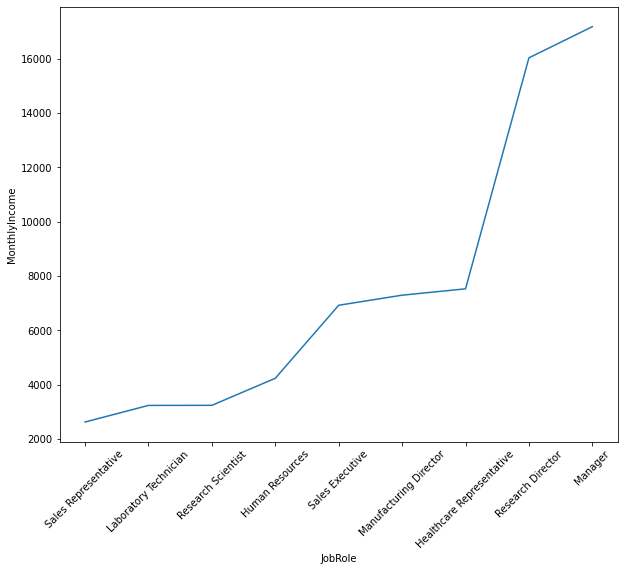

In [48]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
sns.lineplot(data=pd.DataFrame(df.groupby('JobRole')['MonthlyIncome'].mean()).reset_index().sort_values(by=['MonthlyIncome']),
                x='JobRole', y='MonthlyIncome')

فاصله بسیار زیاد درآمد مدیران و مسئولین تحقیق را مشاهده میکنید که به شدت با سایر کارمندان متفاوت اند

<AxesSubplot:xlabel='Education', ylabel='Count'>

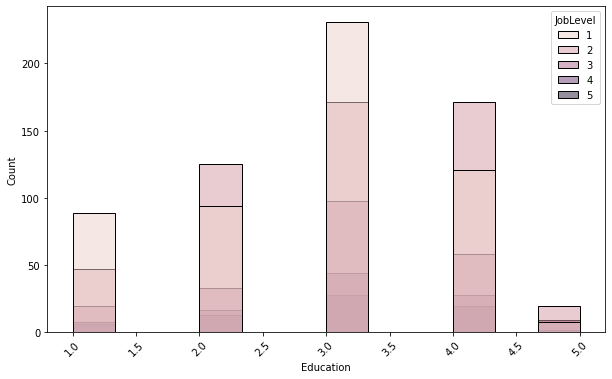

In [49]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.histplot(data=df, x='Education', hue='JobLevel')

In [50]:
contingency_table = pd.crosstab(df.Education, df.JobLevel) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)


JobLevel,1,2,3,4,5
Education,,,,,
1,0.163904,0.088015,0.091743,0.075472,0.086957
2,0.173112,0.234082,0.151376,0.160377,0.188406
3,0.425414,0.320225,0.449541,0.415094,0.405797
4,0.222836,0.320225,0.266055,0.264151,0.289855
5,0.014733,0.037453,0.041284,0.084906,0.028986


In [51]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=16
[[ 62.79591837  61.75510204  25.21088435  12.2585034    7.97959184]
 [104.16734694 102.44081633  41.82040816  20.33469388  13.23673469]
 [211.28979592 207.7877551   84.82721088  41.2462585   26.84897959]
 [147.01632653 144.57959184  59.02312925  28.69931973  18.68163265]
 [ 17.73061224  17.43673469   7.11836735   3.46122449   2.25306122]]
probability=0.950, critical=26.296, stat=61.176
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


همان طور که رشته تحصیلی با نوع شغل در سازمان ارتباط دارد، سطح تحصیلات نیز با سطح شغلی کارمندان در شرکت نیز ارتباط دارد

<AxesSubplot:xlabel='Education', ylabel='Count'>

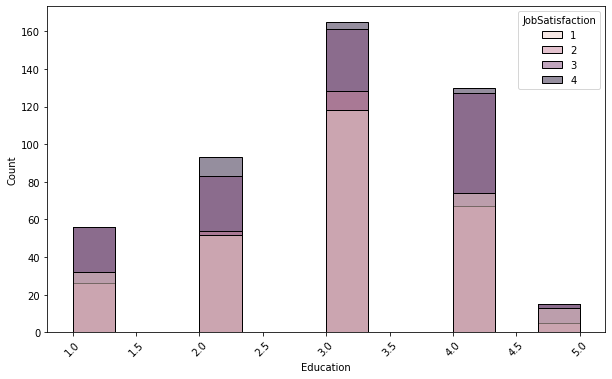

In [52]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.histplot(data=df, x='Education', hue='JobSatisfaction')

In [53]:
contingency_table = pd.crosstab(df.Education, df.JobSatisfaction) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)


JobSatisfaction,1,2,3,4
Education,,,,
1,0.110727,0.092857,0.126697,0.122004
2,0.179931,0.192857,0.187783,0.202614
3,0.408304,0.457143,0.364253,0.359477
4,0.256055,0.239286,0.287330,0.283224
5,0.044983,0.017857,0.033937,0.032680


In [54]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=12
[[ 33.42176871  32.38095238  51.11564626  53.08163265]
 [ 55.44081633  53.71428571  84.79183673  88.05306122]
 [112.45442177 108.95238095 171.98911565 178.60408163]
 [ 78.2462585   75.80952381 119.6707483  124.27346939]
 [  9.43673469   9.14285714  14.43265306  14.9877551 ]]
probability=0.950, critical=21.026, stat=13.030
Independent (fail to reject H0)
significance=0.050, p=0.367
Independent (fail to reject H0)


با اینحال رضایت از کار ارتباطی با سطح تحصیلات ندارد

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Count'>

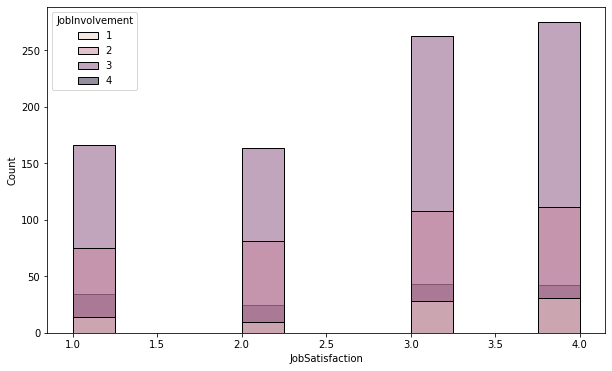

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='JobSatisfaction', hue='JobInvolvement')

In [56]:
contingency_table = pd.crosstab(df.JobInvolvement, df.JobSatisfaction) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)


JobSatisfaction,1,2,3,4
JobInvolvement,,,,
1,0.048443,0.035714,0.063348,0.067538
2,0.259516,0.289286,0.244344,0.241830
3,0.574394,0.585714,0.595023,0.599129
4,0.117647,0.089286,0.097285,0.091503


In [57]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=9
[[ 16.31768707  15.80952381  24.95646259  25.91632653]
 [ 73.7244898   71.42857143 112.75510204 117.09183673]
 [170.64761905 165.33333333 260.99047619 271.02857143]
 [ 28.31020408  27.42857143  43.29795918  44.96326531]]
probability=0.950, critical=16.919, stat=7.421
Independent (fail to reject H0)
significance=0.050, p=0.593
Independent (fail to reject H0)


یکی از نکات جالب این است که با وجود اینکه ممکن است تصور شود بین رضایت از کار و میزان مشارکت در شغل ارتباطی وجود داشته باشد اما حداقل این فرضیه در مورد جامعه ما صدق نمیکند

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

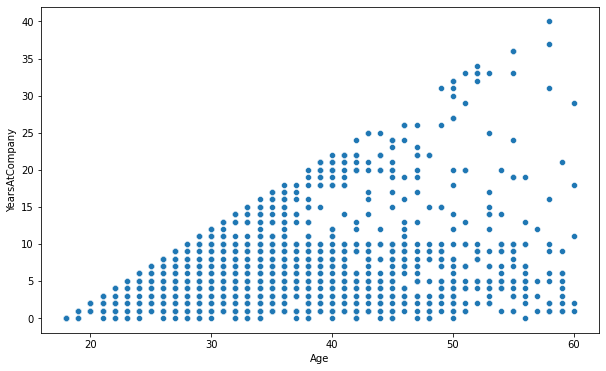

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='YearsAtCompany')

<AxesSubplot:xlabel='Age', ylabel='WorkLifeBalance'>

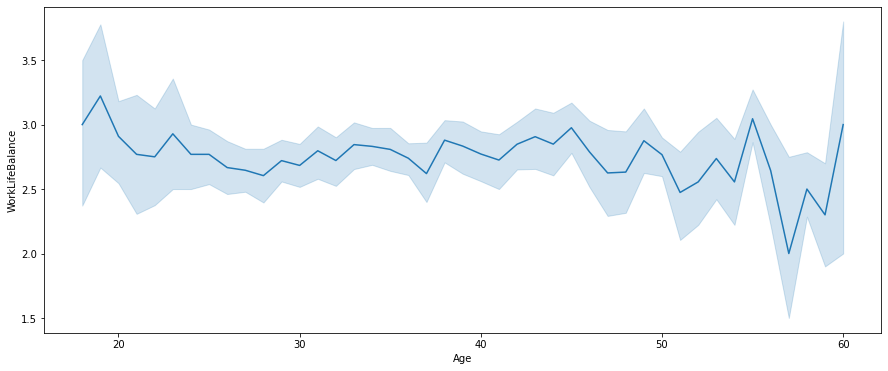

In [59]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Age', y='WorkLifeBalance')

از نکات جالب در موضوع تعادل بین کار و زندگی این است که بیشترین ناهنجاری ها به نظر میرسد در سنین خیلی پایین و یا خیلی بالا در جامعه سازمانی ما رخ میدهند

<AxesSubplot:xlabel='MaritalStatus', ylabel='YearsAtCompany'>

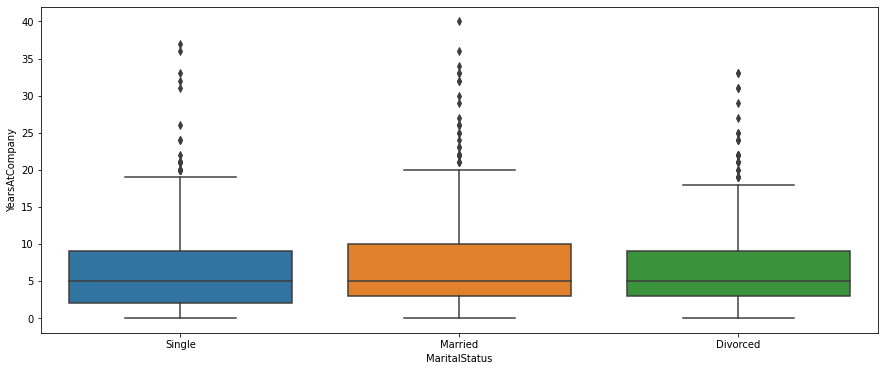

In [60]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='MaritalStatus', y='YearsAtCompany')

In [61]:
single_married = stats.ttest_ind(df[df['MaritalStatus']=="Single"]['YearsAtCompany'], df[df['MaritalStatus']=="Married"]['YearsAtCompany'])
married_divorced = stats.ttest_ind(df[df['MaritalStatus']=="Married"]['YearsAtCompany'], df[df['MaritalStatus']=="Divorced"]['YearsAtCompany'])
single_divorced = stats.ttest_ind(df[df['MaritalStatus']=="Single"]['YearsAtCompany'], df[df['MaritalStatus']=="Divorced"]['YearsAtCompany'])

if single_married[1] <= 0.05: 
    print('p-value between Single & Married YearsAtCompany: ', single_married[1])
    print('reject H0: not equal')
else: 
    print('p-value between Single & Married YearsAtCompany: ', single_married[1])
    print('accept H0: equal')

if married_divorced[1] <= 0.05: 
    print('p-value between Married & Together YearsAtCompany: ', married_divorced[1])
    print('reject H0: not equal')
else: 
    print('p-value between Married & Together YearsAtCompany: ', married_divorced[1])
    print('accept H0: equal')

if single_divorced[1] <= 0.05: 
    print('p-value between Single & Together YearsAtCompany: ', single_divorced[1])
    print('reject H0: not equal')
else: 
    print('p-value between Single & Together YearsAtCompany: ', single_divorced[1])
    print('accept H0: equal')


p-value between Single & Married YearsAtCompany:  0.010625532709863163
reject H0: not equal
p-value between Married & Together YearsAtCompany:  0.9908223400522773
accept H0: equal
p-value between Single & Together YearsAtCompany:  0.03342788663399902
reject H0: not equal


از دیگر نکاتی که میتوان به آن اشاره کرد این است که افرادی که ازدواج کرده ان و یا حداقل برای مدتی ازدواج کرده بودند، علاقه بیشتری به ماندن در شرکت دارند و تمایل بیشتری به ثبات نشان میدهند که کاملا قابل انتظار است

<AxesSubplot:xlabel='JobRole', ylabel='Count'>

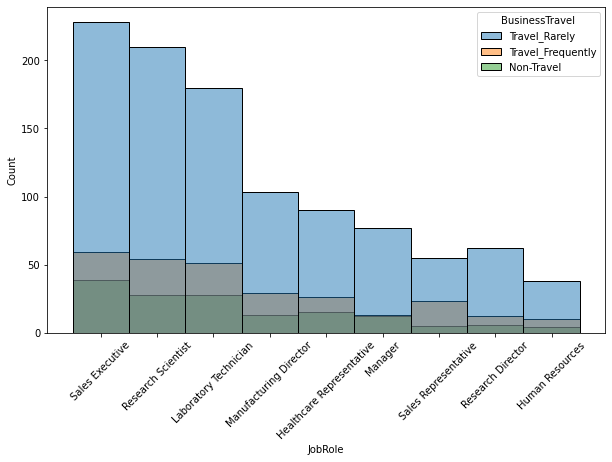

In [62]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.histplot(data=df, x='JobRole', hue='BusinessTravel')

<AxesSubplot:xlabel='BusinessTravel', ylabel='RelationshipSatisfaction'>

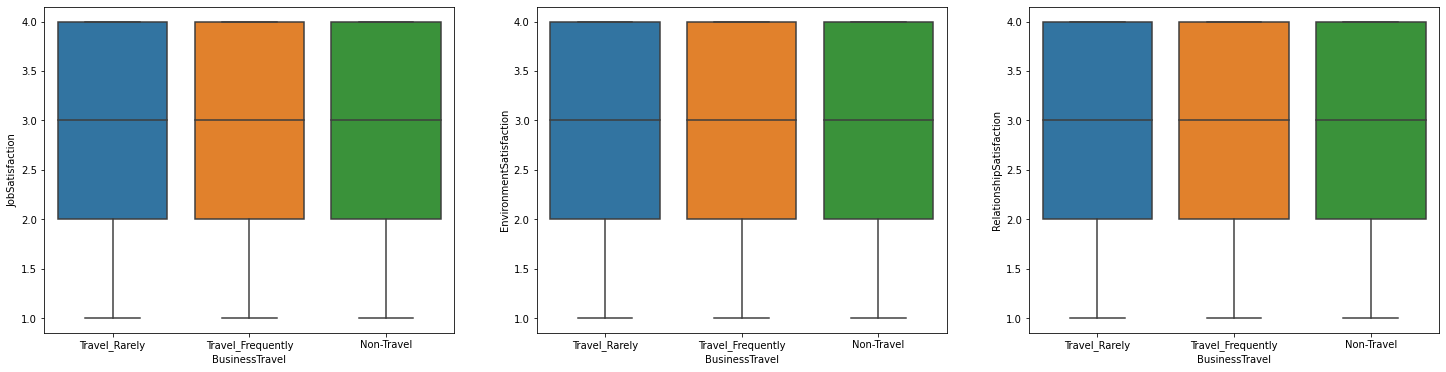

In [63]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation=45)
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='BusinessTravel', y='JobSatisfaction')
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='BusinessTravel', y='EnvironmentSatisfaction')
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='BusinessTravel', y='RelationshipSatisfaction')

<AxesSubplot:xlabel='JobRole', ylabel='Count'>

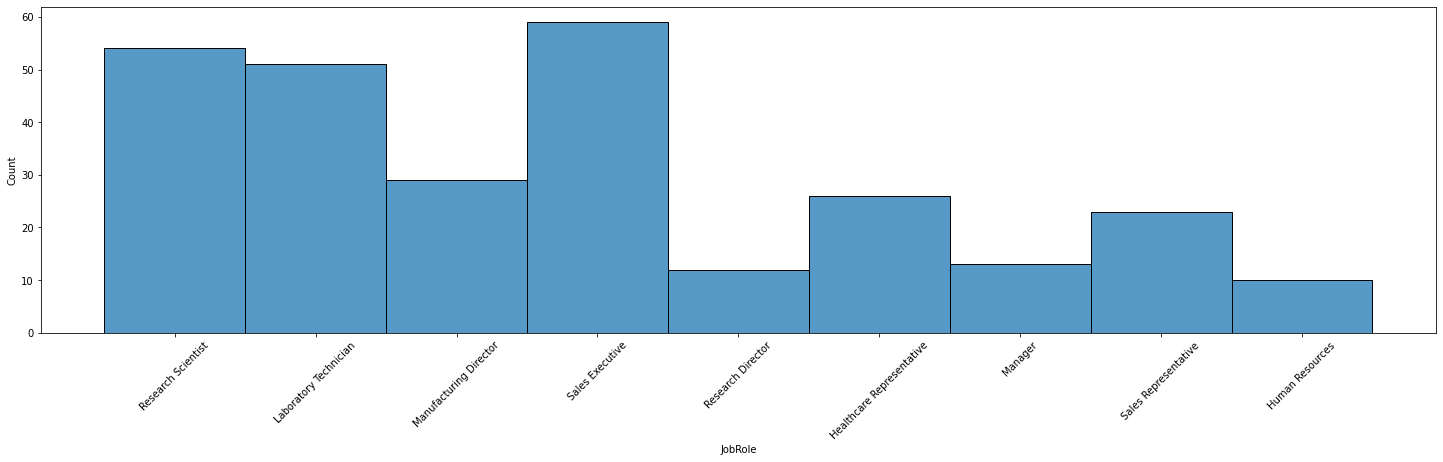

In [64]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation=45)
sns.histplot(data=df[df.BusinessTravel=='Travel_Frequently'], x='JobRole')

<AxesSubplot:>

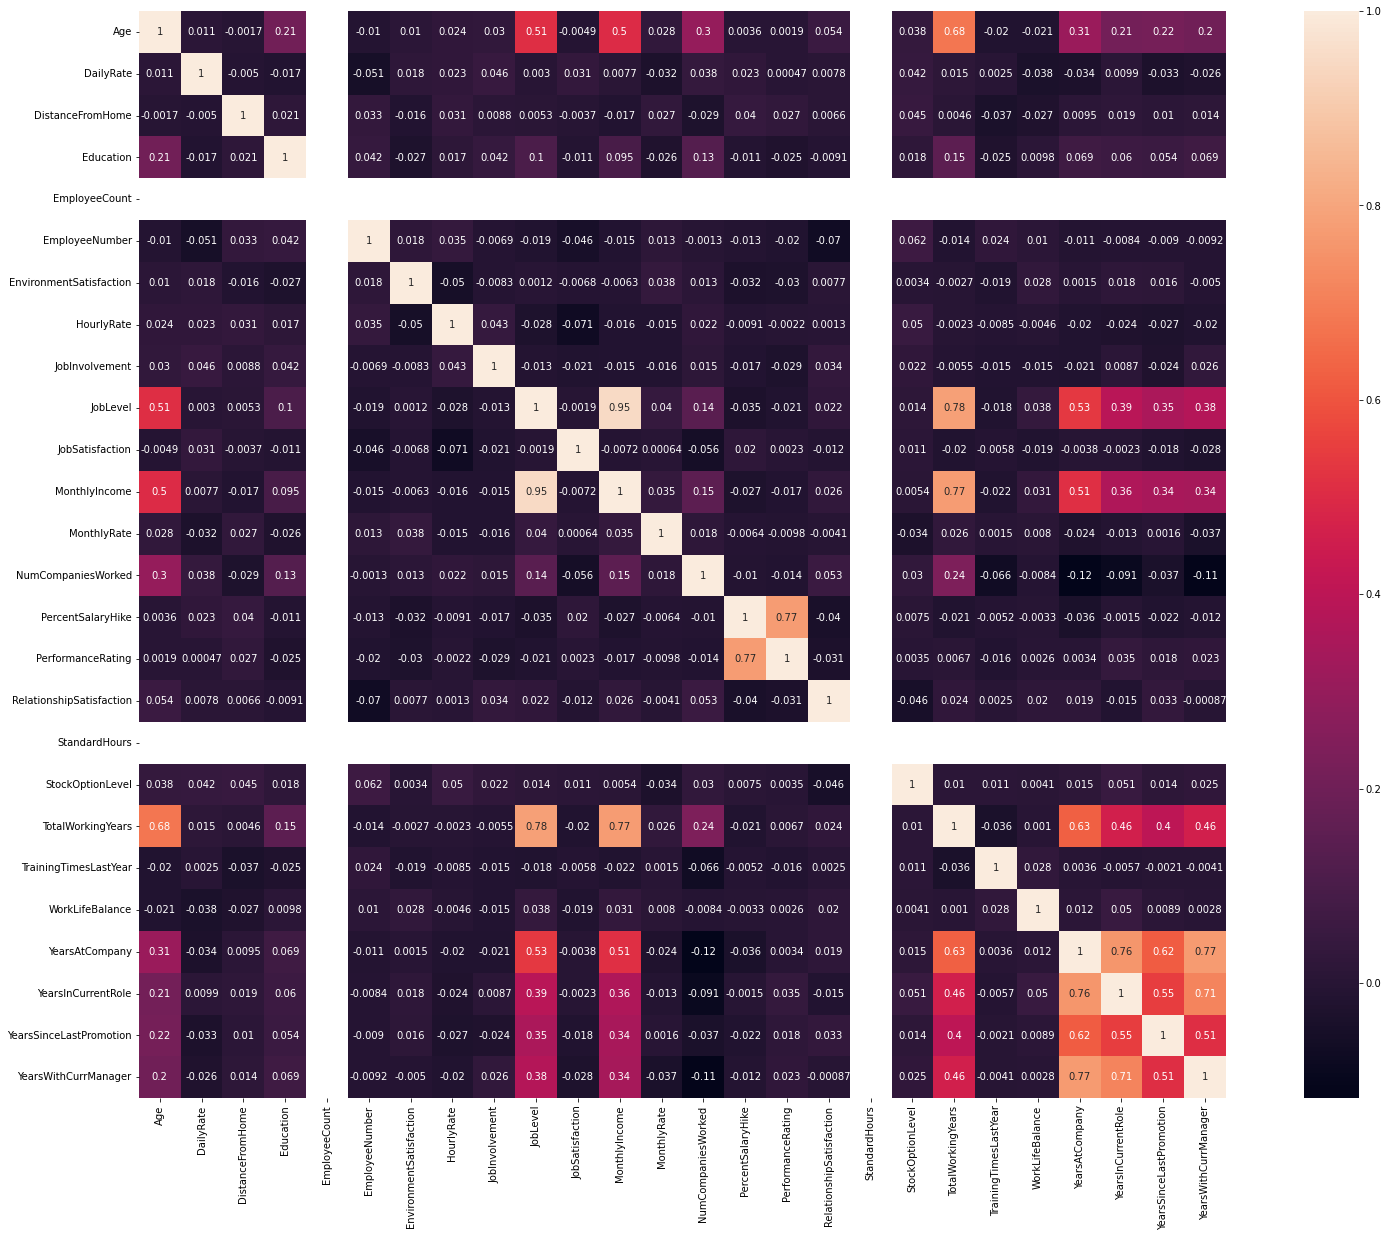

In [65]:
plt.figure(figsize=(28, 20))
sns.heatmap(df.corr(), square=True, annot=True)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

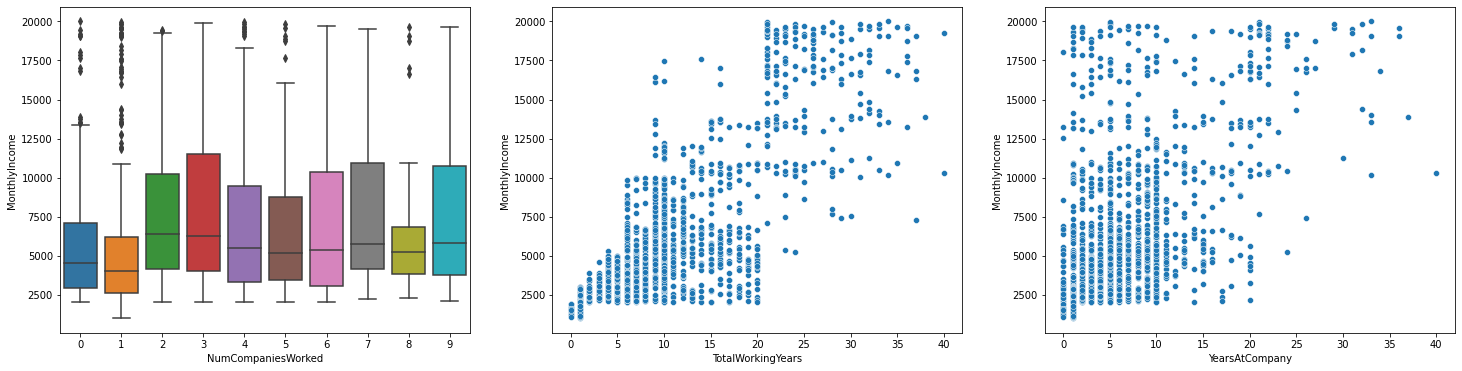

In [66]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='NumCompaniesWorked', y='MonthlyIncome')
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome')
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='YearsAtCompany', y='MonthlyIncome')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

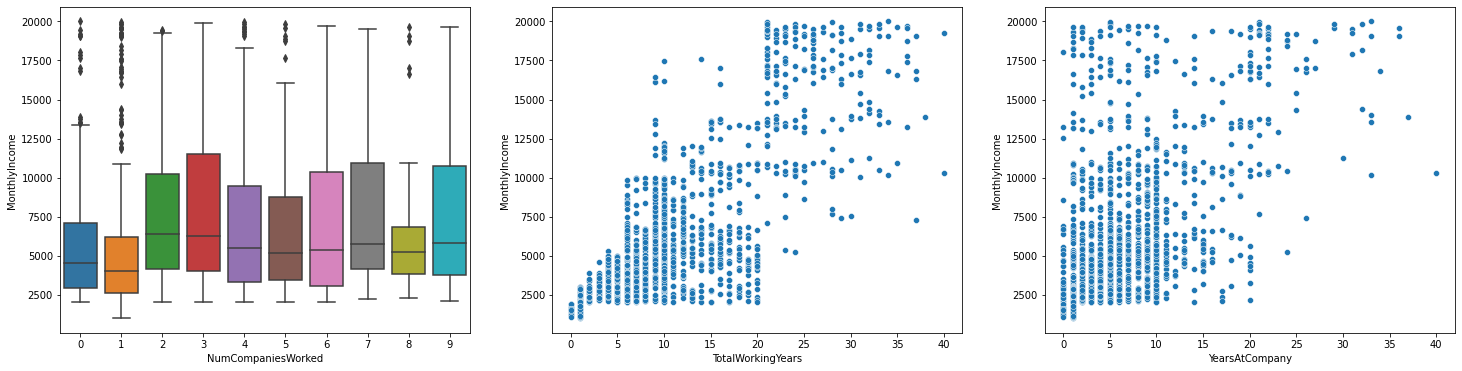

In [67]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='NumCompaniesWorked', y='MonthlyIncome')
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome')
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='YearsAtCompany', y='MonthlyIncome')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

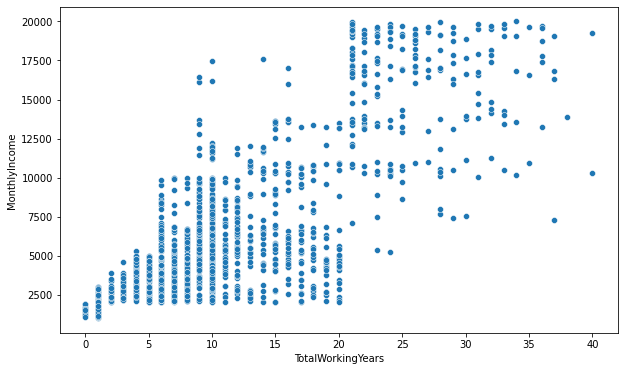

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome')

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='TotalWorkingYears'>

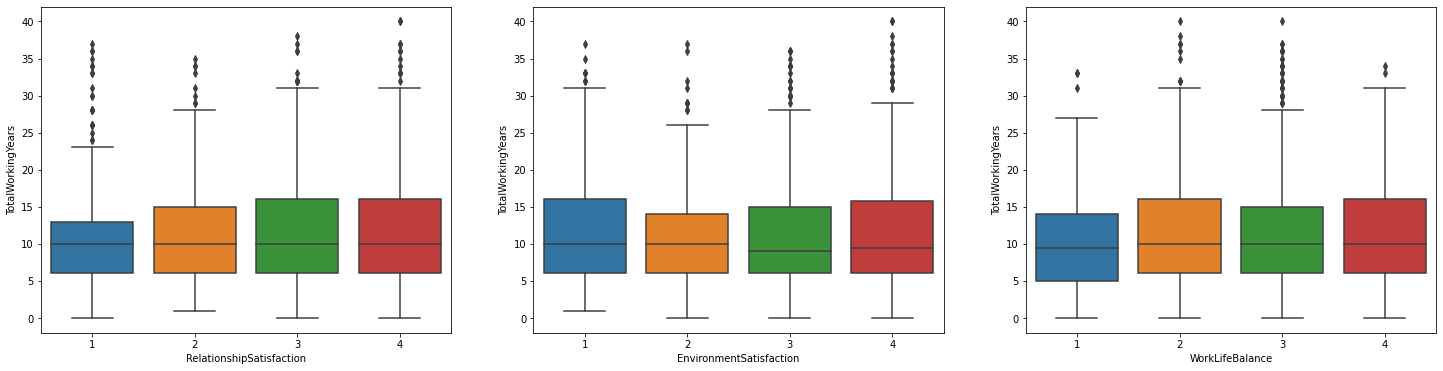

In [69]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation=45)
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='RelationshipSatisfaction', y='TotalWorkingYears')
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='EnvironmentSatisfaction', y='TotalWorkingYears')
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='WorkLifeBalance', y='TotalWorkingYears')

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

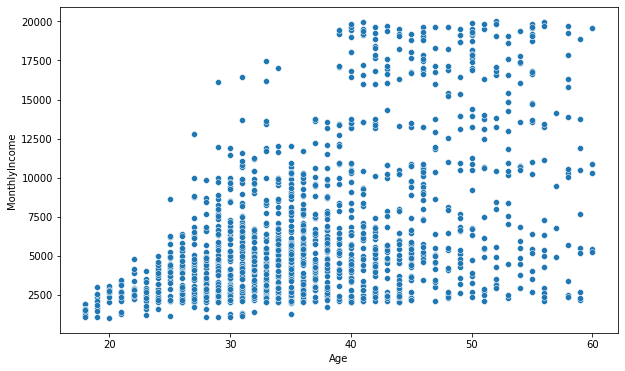

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

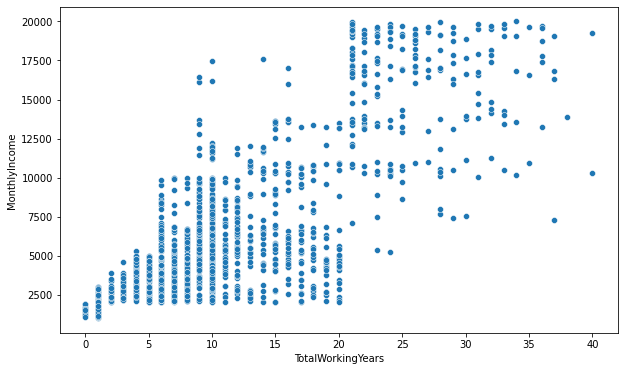

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome')

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

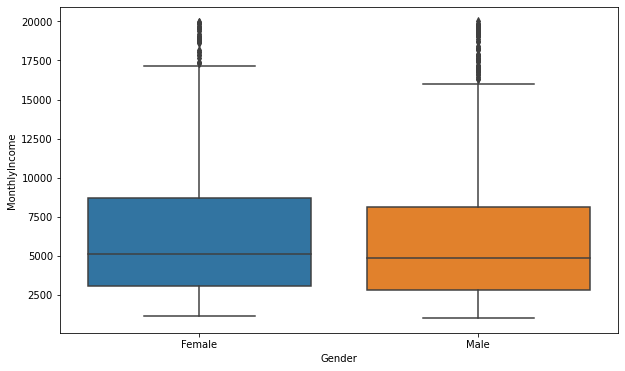

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='MonthlyIncome')

In [73]:
male_female = stats.ttest_ind(df[df['Gender']=="Male"]['MonthlyIncome'], df[df['Gender']=="Female"]['MonthlyIncome'], alternative="two-sided")

if male_female[1] <= 0.05: 
    print('p-value between Single & Married MonthlyIncome: ', male_female[1])
    print('reject H0: not equal')
else: 
    print('p-value between Single & Married MonthlyIncome: ', male_female[1])
    print('accept H0: equal')



p-value between Single & Married MonthlyIncome:  0.22218303455087904
accept H0: equal


فرضیه ابتدایی ما در خصوص تفاوت مردان زنان حداقل در خصوص حقوق دریافتی کارمندان باطل است و این دو گروه میانگین درآمد یکسانی دارند

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Count'>

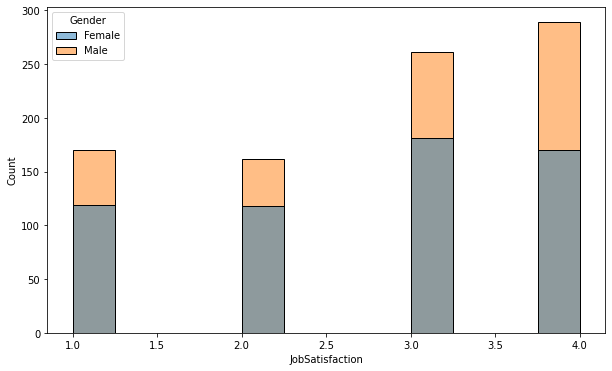

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='JobSatisfaction', hue='Gender')

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

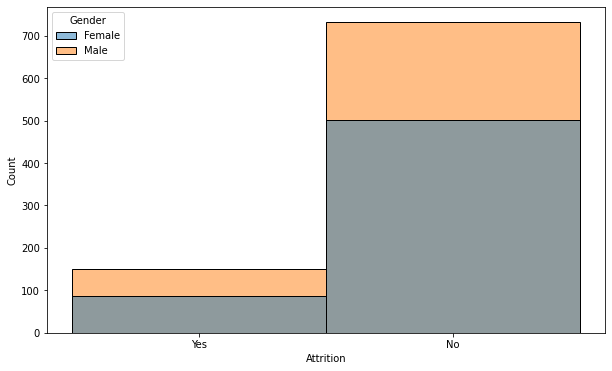

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Attrition', hue='Gender')

همچنین به نظر میرسد با توجه به تعداد کم تر زنان، آن ها رضایت بیشتری از کار در شرکت دارند

In [76]:
contingency_table = pd.crosstab(df.Gender, df.JobSatisfaction) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=3
[[115.6 112.  176.8 183.6]
 [173.4 168.  265.2 275.4]]
probability=0.950, critical=7.815, stat=2.548
Independent (fail to reject H0)
significance=0.050, p=0.467
Independent (fail to reject H0)


In [77]:
contingency_table = pd.crosstab(df.Attrition, df.Gender) #Contingency Table
contingency_table.apply(lambda r:r/r.sum(),axis=0)

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[493.2 739.8]
 [ 94.8 142.2]]
probability=0.950, critical=3.841, stat=1.117
Independent (fail to reject H0)
significance=0.050, p=0.291
Independent (fail to reject H0)


با اینحال تست ها نشان میدهند که هم متغیر استهلاک و هم متغیر رضایت از کار از متغیر جنسیت مجزا هستند و ارتباطی بین آن ها نیست، این متغیرها به صورت مستقل از هم کار میکنند

<AxesSubplot:xlabel='JobLevel', ylabel='Age'>

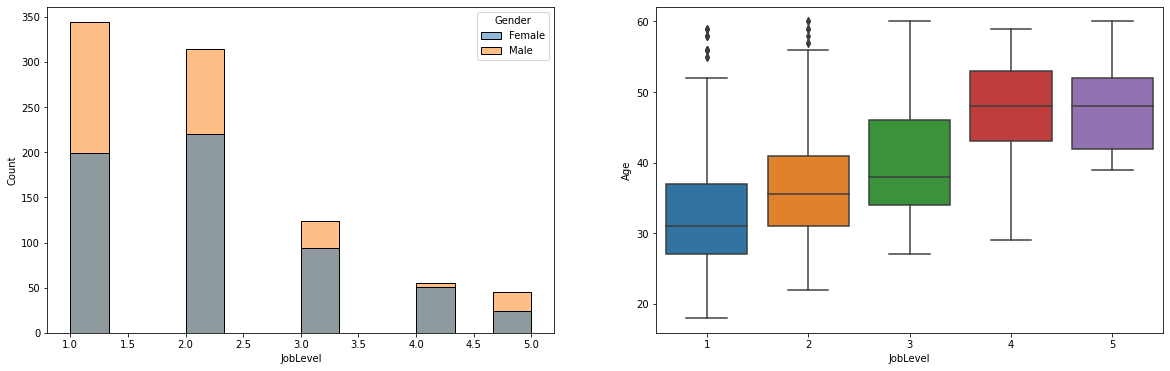

In [78]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x='JobLevel', hue='Gender')
plt.subplot(122)
sns.boxplot(data=df, x='JobLevel', y='Age')

<AxesSubplot:xlabel='JobLevel', ylabel='Education'>

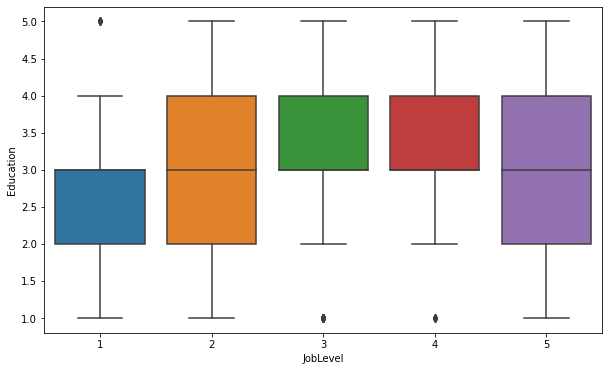

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobLevel', y='Education')

<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

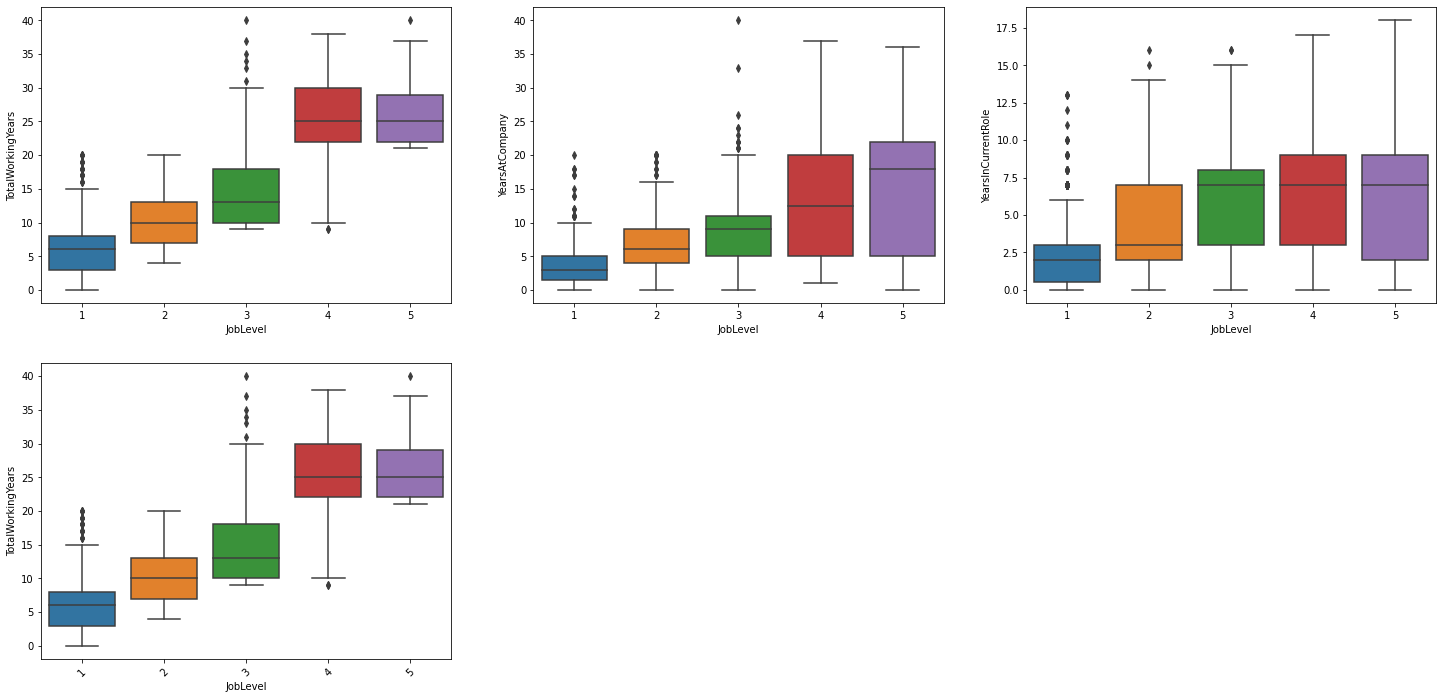

In [80]:
plt.figure(figsize=(25, 12))
plt.subplot(231)
sns.boxplot(data=df, x='JobLevel', y='TotalWorkingYears')
plt.subplot(232)
sns.boxplot(data=df, x='JobLevel', y='YearsAtCompany')
plt.subplot(233)
sns.boxplot(data=df, x='JobLevel', y='YearsInCurrentRole')
plt.subplot(234)
plt.xticks(rotation=45)
sns.boxplot(data=df, x='JobLevel', y='TotalWorkingYears')

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

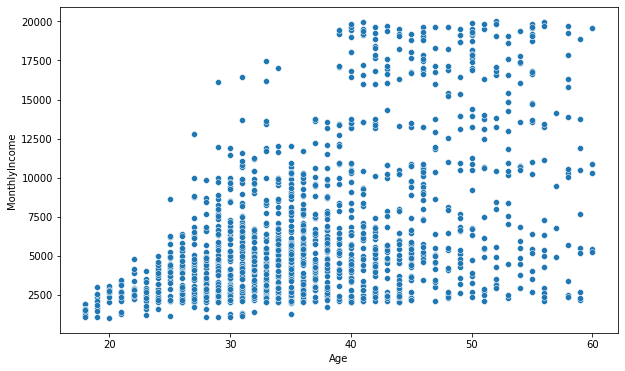

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome')

<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

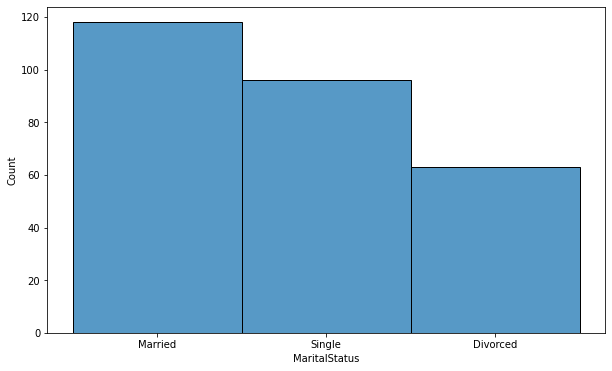

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df.BusinessTravel=='Travel_Frequently'], x='MaritalStatus')

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

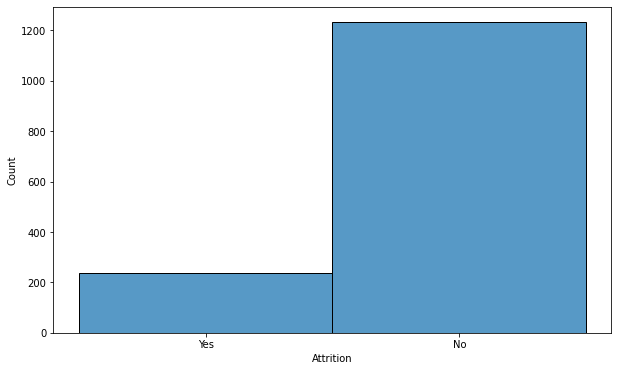

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Attrition')